## Homework 4
### Mohammed Shahriar Arefin (915811449)
#### Date: 10/04/2021



Homework Task:

Perform the following tasks, and submit an ipynb file with your results. The goal is to create clusters of a group of random numbers

1. create a list of 1000 random numbers, x, such that 500 of them are normally distributed with N(0,1) and the other 500 with normal distribution N(3,1). Show a histogram of your numbers

2. pick two numbers at random somewhere between min(x) and max(x). These will be the initial center points for two clusters, Cluster A and Cluster B

3. for each of the 1000 points, assign it membership to either cluster A or cluster B depending on whether it is closest to the center point for each cluster

4. compute the average of all the points in Cluster A, and the average of all the points in Cluster B. These will be your new (updated) center points.

5. repeat steps 3 and 4 many times, until the center points stop moving very much

At this point, clustering is complete. Create separate histograms for the points in Clusters A and B. Has the clustering worked well?

Try this procedure again but using three clusters (A, B, C) instead of just two.


#### Solution:

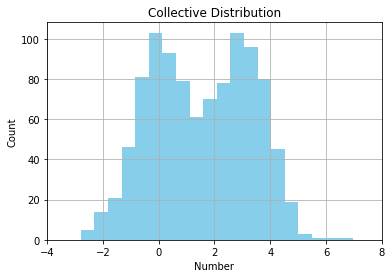

In [1]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)

# Generate two random number distribution with given mean and size 
x1=np.random.normal(0,1,500)
x2=np.random.normal(3,1,500)

# Add two different distribution in a single set

x=np.concatenate((x1,x2))
plt.hist(x,bins=20,color='skyblue')
plt.xlabel('Number')
plt.ylabel('Count')
plt.title('Collective Distribution')
plt.xlim(-4,8)
plt.grid()
plt.show()


In [2]:
# select cluster and iteration number
number_cluster=2
number_iterations=50

# Select center in between the mergred dataset
center=np.random.uniform(min(x),max(x),number_cluster)
print(center)


[0.98071316 2.01333535]


#### The stratergy here is applied in the following logic:

1) Create a random center(centroid)for two cluster

2) Find the difference between two center and the datapoint

3) Based on the difference, find out the nearest center for the datapoint

4) Assign indexing for the datapoint based on closeness to the particular cluster center

5) Take the mean of all datapoint assigned in two clusters to find out the new centers 

6) Find the difference between new center and old center 

7) Continue the iteration until the difference becomes less than a specified threshold


In [3]:
# Create an array to store cluster identity 
cluster=np.zeros(len(x))

# Update and store center here
centers=[]
# To store the difference between two centers here to determine the center is stable 
center_difference=[]



for i in range(number_iterations):
    centers=center # store Center
    for m,n in enumerate(x):                # Find the index and value of x
        difference=np.abs(center-n)         # Find difference between x and center
        cluster[m]=np.argmin(difference)    # Find the closest cluster for the datapoint
          
        center_1=np.mean(x[(cluster==0)])   # Take mean of the points to find new center for cluster 1
        center_2=np.mean(x[(cluster==1)])   # Take mean of the points to find new center for cluster 2
        
        center=[center_1,center_2]          # Store new center
    center_difference=((abs(center[0]-centers[0]))+(abs(center[1]-centers[1])))   # Difference between new and old center
    print(center_difference)
    if center_difference<0.001:              # A random threshold set. If value below it, stop iterations
        break
  
        
        

2.033854916618479
0.23851280376928102
0.06802405439120487
0.018565287246039085
0.01856667427238443
0.0


In [4]:
# Find the datapoint assigned to each cluster after iterations
cluster_1=x[cluster==0]
cluster_2=x[cluster==1]

Mean_val_cluster1=np.mean(cluster_1)
print(f" Mean_val_C1: {Mean_val_cluster1:0.2f}")
Standard_dev_cluster1=np.std(cluster_1)
print(f" Standard_dev_C1: {Standard_dev_cluster1:0.2f}")

Mean_val_cluster2=np.mean(cluster_2)
print(f" Mean_val_C2: {Mean_val_cluster2:0.2f}")
Standard_dev_cluster2=np.std(cluster_2)
print(f" Standard_dev_C2: {Standard_dev_cluster1:0.2f}")

 Mean_val_C1: -0.02
 Standard_dev_C1: 0.89
 Mean_val_C2: 3.07
 Standard_dev_C2: 0.89


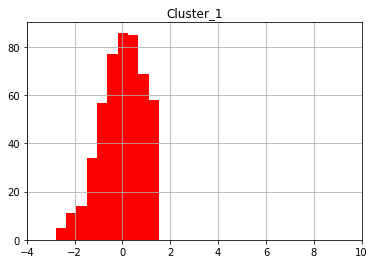

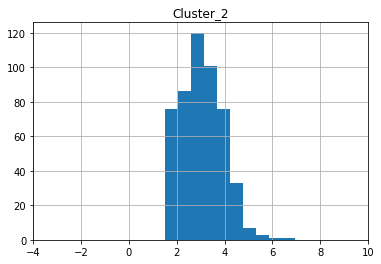

In [5]:
plt.hist(cluster_1,color='red')
plt.xlim(-4,10)
plt.title('Cluster_1')
plt.grid()
plt.show()
plt.figure()
plt.hist(cluster_2)
plt.title('Cluster_2')
plt.xlim(-4,10)
plt.grid()
plt.show()




#### Conclusion:

Here, we applied an algorithm which tries to find the appropriate place for a datapoint based on distances from the centroid or center point. The center point gets changed until it reaches stability. 

After, applying these clustering technique, it is evident that the algorithm was able to identify two different clusters with good accuracy from a mixed dataset or array. 

Although, the mean of the clusters are not same as the generated dataset, the new cluster mean values were closer to  the original one. The only downside of the algorithm was the misclassification of the values where the datapointsfrom different distribution got overlapped with each other. Rather than getting a perfect normal distribution, we got skewed distributions in the final clustered data/histogram. 

Otherwise, the intended algorithm worked good. 

#### Expanding the Algorithm for 3 Distributions/cluster

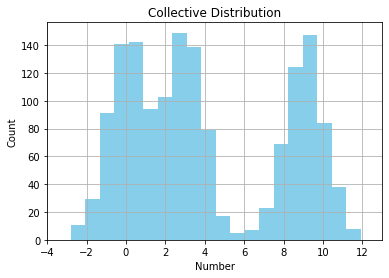

In [6]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)

# Generate 3 random number distribution with given mean and size 
x1=np.random.normal(0,1,500)
x2=np.random.normal(3,1,500)
x3=np.random.normal(9,1,500)

# Add 3 different distribution in a single set

x=np.concatenate((x1,x2,x3))
plt.hist(x,bins=20,color='skyblue')
plt.xlabel('Number')
plt.ylabel('Count')
plt.title('Collective Distribution')
plt.xlim(-4,13)
plt.grid()
plt.show()


In [7]:
# select cluster and iteration number
number_cluster=3
number_iterations=50

# Select 3 center in the mergred dataset
center=np.random.uniform(min(x),max(x),number_cluster)
print(center)


[ 3.46476749  9.13294358 11.06243256]


In [8]:
# Create an array to store cluster identity 
cluster=np.zeros(len(x))

# Update and store center here
centers=[]
# To store the difference between two centers here to determine the center is stable 
center_difference=[]



for i in range(number_iterations):
    centers=center # store Center
    for m,n in enumerate(x):                # Find the index and value of x
        difference=np.abs(center-n)         # Find difference between x and center
        cluster[m]=np.argmin(difference)    # Find the closest cluster for the datapoint
          
        center_1=np.mean(x[(cluster==0)])   # Take mean of the points to find new center for cluster 1
        center_2=np.mean(x[(cluster==1)])   # Take mean of the points to find new center for cluster 2
        center_3=np.mean(x[(cluster==2)])   # Take mean of the points to find new center for cluster 3

        
        center=[center_1,center_2, center_3]          # Store new center
    center_difference=((abs(center[0]-centers[0]))+(abs(center[1]-centers[1]))+(abs(center[2]-centers[2])))   # Difference between new and old center
    print(center_difference)
    if center_difference<0.001:              # A random threshold set. If value below it, stop iterations
        break
  
        
        

D:\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
D:\anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


24.029239795760603
2.043407486419819
0.4197834905561604
0.049463999791452544
0.006184282415881197
0.0


In [9]:
# Find the datapoint assigned to each cluster after iterations
cluster_1=x[cluster==0]
cluster_2=x[cluster==1]
cluster_3=x[cluster==2]


Mean_val_cluster1=np.mean(cluster_1)
print(f" Mean_val_C1: {Mean_val_cluster1:0.2f}")
Standard_dev_cluster1=np.std(cluster_1)
print(f" Standard_dev_C1: {Standard_dev_cluster1:0.2f}")

Mean_val_cluster2=np.mean(cluster_2)
print(f" Mean_val_C2: {Mean_val_cluster2:0.2f}")
Standard_dev_cluster2=np.std(cluster_2)
print(f" Standard_dev_C2: {Standard_dev_cluster1:0.2f}")

Mean_val_cluster3=np.mean(cluster_3)
print(f" Mean_val_C3: {Mean_val_cluster3:0.2f}")
Standard_dev_cluster3=np.std(cluster_3)
print(f" Standard_dev_C3: {Standard_dev_cluster3:0.2f}")

 Mean_val_C1: 9.08
 Standard_dev_C1: 1.01
 Mean_val_C2: -0.03
 Standard_dev_C2: 1.01
 Mean_val_C3: 3.06
 Standard_dev_C3: 0.87


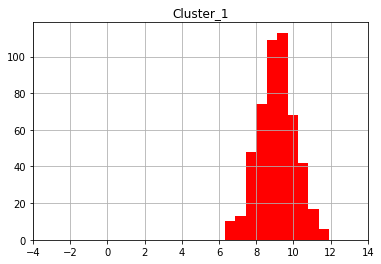

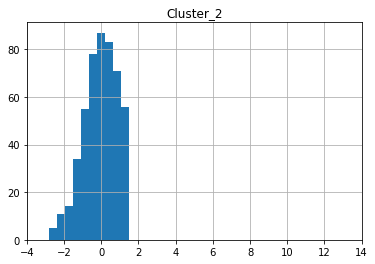

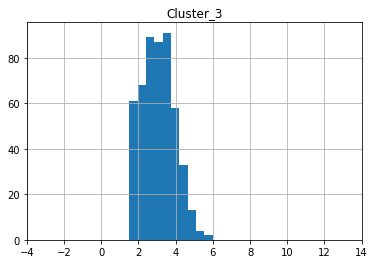

In [10]:
plt.hist(cluster_1,color='red')
plt.xlim(-4,14)
plt.title('Cluster_1')
plt.grid()
plt.show()
plt.figure()
plt.hist(cluster_2)
plt.title('Cluster_2')
plt.xlim(-4,14)
plt.grid()
plt.show()
plt.figure()
plt.hist(cluster_3)
plt.title('Cluster_3')
plt.xlim(-4,14)
plt.grid()
plt.show()




#### Conclusion:

Here, we expanded the algorithm to identify three different clusters. 

Here, we were successful to identify three separate clusters with good accuracy. For cluster-2 and cluster-3, the mean and standard deviation was closer to the original one, but the clustered distributions weren't perfectly normal. Rather the distributions were skewed due to the misclassification of overlapped regions. 

But, for cluster-1, the distribution was normal due to higher separation from the cluster-3. It seems like with increased spacing the detection accuracy of this algorithm gets higher. 
